# The Enhancement and Automated Counting of Bats

# The Training and Testing Models For Bat Counting

- **Benjamin Bowman**
  - Email: [bbowman9114@floridapoly.edu](mailto:bbowman9114@floridapoly.edu)
- **Zhi Zheng**
  - Email: [zhizheng0889@floridapoly.edu](mailto:zhizheng0889@floridapoly.edu)
- **Nesreen Dalhy**
  - Email: [ndalhy8095@floridapoly.edu](mailto:ndalhy8095@floridapoly.edu)
- **Brendan Geary**
  - Email: [bgeary6291@floridapoly.edu](mailto:bgeary6291@floridapoly.edu)

# Unzip Data
Unzip the correct zip file

### Main Datasets

In [ ]:
!unzip "1_4.zip" -d 1_4_Data

In [ ]:
!unzip "5_8.zip" -d 5_8_Data

In [ ]:
!unzip "9_12.zip" -d 9_12_Data

In [ ]:
!unzip "Bat Time.zip" -d Final

Streaming output truncated to the last 5000 lines.
 extracting: Final/Bat Time/9/9_emergence_1899.jpg  
 extracting: Final/Bat Time/9/9_emergence_19.jpg  
 extracting: Final/Bat Time/9/9_emergence_190.jpg  
 extracting: Final/Bat Time/9/9_emergence_1900.jpg  
 extracting: Final/Bat Time/9/9_emergence_1901.jpg  
 extracting: Final/Bat Time/9/9_emergence_1902.jpg  
 extracting: Final/Bat Time/9/9_emergence_1903.jpg  
 extracting: Final/Bat Time/9/9_emergence_1904.jpg  
 extracting: Final/Bat Time/9/9_emergence_1905.jpg  
 extracting: Final/Bat Time/9/9_emergence_1906.jpg  
 extracting: Final/Bat Time/9/9_emergence_1907.jpg  
 extracting: Final/Bat Time/9/9_emergence_1908.jpg  
 extracting: Final/Bat Time/9/9_emergence_1909.jpg  
 extracting: Final/Bat Time/9/9_emergence_191.jpg  
 extracting: Final/Bat Time/9/9_emergence_1910.jpg  
 extracting: Final/Bat Time/9/9_emergence_1911.jpg  
 extracting: Final/Bat Time/9/9_emergence_1912.jpg  
 extracting: Final/Bat Time/9/9_emergence_1913.jpg  

### Testing Datasets

In [ ]:
!unzip "1_4_Testing.zip" -d 1_4_Testing

In [ ]:
!unzip "5_8_Testing.zip" -d 5_8_Testing

In [ ]:
!unzip "9_12_Testing.zip" -d 9_12_Testing

# Training Neural Networks
Only Emergence
* 1-4 bats
* 5-8 bats
* 9-12 bats
* Complexity (1-4) vs (5-8) vs (9-12) bats


## Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Model Creation Functions
Run this cell before running any other section

In [ ]:
def create_model():
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 3)),  # First conv layer with 32 filters.
      MaxPooling2D(2, 2),  # First pooling layer with a 2x2 window.
      Conv2D(64, (3, 3), activation='relu'),  # Second conv layer with 64 filters.
      MaxPooling2D(2, 2),  # Second pooling layer.
      Conv2D(128, (3, 3), activation='relu'),  # Third conv layer with 128 filters.
      MaxPooling2D(2, 2),  # Third pooling layer.
      Flatten(),  # Flatten the output to feed into the dense layer.
      Dense(512, activation='relu'),  # Dense layer with 512 units.
      Dense(4, activation='softmax')  # Output layer with 4 units for 4 classes.
  ])

  # Compile the model with an optimizer, loss function, and metrics
  model.compile(optimizer='adam',  # Adam optimizer with default settings.
                loss='sparse_categorical_crossentropy',  # Suitable for integer-labeled data.
                metrics=['accuracy'])  # Track accuracy during training.
  return model

In [ ]:
def create_model_with_padding(num_classes=4):
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 3), padding='same'),  # First conv layer with 32 filters.
      MaxPooling2D(2, 2),  # First pooling layer with a 2x2 window.
      Conv2D(64, (3, 3), activation='relu', padding='same'),  # Second conv layer with 64 filters.
      MaxPooling2D(2, 2),  # Second pooling layer.
      Conv2D(128, (3, 3), activation='relu', padding='same'),  # Third conv layer with 128 filters.
      MaxPooling2D(2, 2),  # Third pooling layer.
      Flatten(),  # Flatten the output to feed into the dense layer.
      Dense(512, activation='relu'),  # Dense layer with 512 units.
      Dense(num_classes, activation='softmax')  # Output layer with 4 units for 4 classes.
  ])

  # Compile the model with an optimizer, loss function, and metrics
  model.compile(optimizer='adam',  # Adam optimizer with default settings.
                loss='sparse_categorical_crossentropy',  # Suitable for integer-labeled data.
                metrics=['accuracy'])  # Track accuracy during training.
  return model

## 1-4 Bats
Change `<path to data>`
* Load data
* call `create_model()`
* fit on data
* When done download the .keras file.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# Specify the path to the training data directory.
train_directory = "<Path to Data>"
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 19201 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


In [ ]:
model_1_4 = create_model_with_padding()

In [ ]:
# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint(
    filepath='1_4_bats.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

In [ ]:
# Train the model
history = model_1_4.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Total number of steps (batches of samples).
    epochs=50,  # Total number of epochs to train for.
    validation_data=validation_generator,  # Validation data to evaluate the model.
    validation_steps=len(validation_generator),  # Total number of steps for validation.
    callbacks=[checkpoint, early_stopping]  # Apply callbacks during training.
)

Epoch 1/50
600/601 [============================>.] - ETA: 0s - loss: 0.7831 - accuracy: 0.6218
Epoch 1: val_loss improved from inf to 0.65488, saving model to 1_4_bats.keras
601/601 [==============================] - 32s 48ms/step - loss: 0.7826 - accuracy: 0.6221 - val_loss: 0.6549 - val_accuracy: 0.7140
Epoch 2/50
601/601 [==============================] - ETA: 0s - loss: 0.5196 - accuracy: 0.7730
Epoch 2: val_loss improved from 0.65488 to 0.43373, saving model to 1_4_bats.keras
601/601 [==============================] - 28s 47ms/step - loss: 0.5196 - accuracy: 0.7730 - val_loss: 0.4337 - val_accuracy: 0.8110
Epoch 3/50
601/601 [==============================] - ETA: 0s - loss: 0.4441 - accuracy: 0.8113
Epoch 3: val_loss improved from 0.43373 to 0.36129, saving model to 1_4_bats.keras
601/601 [==============================] - 29s 48ms/step - loss: 0.4441 - accuracy: 0.8113 - val_loss: 0.3613 - val_accuracy: 0.8510
Epoch 4/50
601/601 [==============================] - ETA: 0s - loss

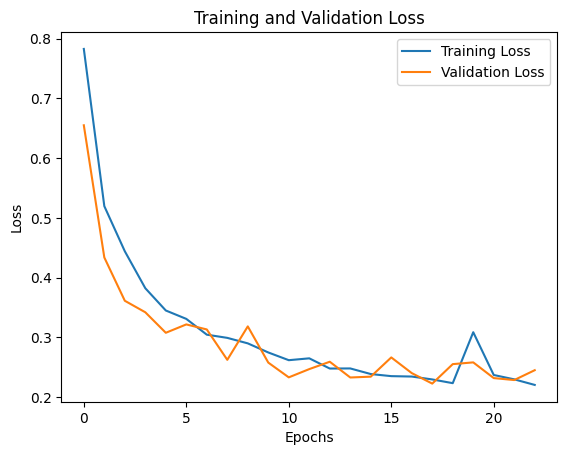

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

### Testing

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0
)

In [ ]:
test_directory = '<Path to Data>'
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(40, 40),
    batch_size=500,
    class_mode='sparse',
    subset='training'
)

Found 24001 images belonging to 4 classes.


In [ ]:
model_path = '<Path to Model>'
test_model_1_4 = tf.keras.models.load_model(model_path)

In [ ]:
batch_images, batch_labels = test_generator.next()
preds = test_model_1_4.predict(batch_images)

16/16 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

preds = test_model_1_4.predict(batch_images)

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate precision, recall, and F1 score using sklearn
average_type = 'weighted'  # Choose 'micro', 'macro', 'weighted', or None
precision = precision_score(batch_labels, batch_predictions_classes, average=average_type)
recall = recall_score(batch_labels, batch_predictions_classes, average=average_type)
f1 = f1_score(batch_labels, batch_predictions_classes, average=average_type)
accuracy = accuracy_score(batch_labels, batch_predictions_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.92
Precision: 0.9202233381821747
Recall: 0.92
F1 Score: 0.9198370564229329


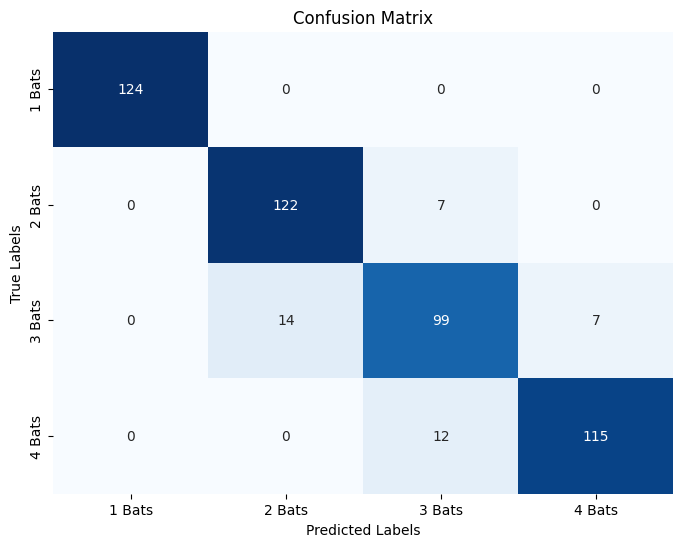

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(batch_labels, batch_predictions_classes)
label_names = ['1 Bats', '2 Bats', '3 Bats', '4 Bats']
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 5-8 Bats
Change `<path to data>`
* Load data from folder
* Call `create_model()`
* fit on data
* When done download the .keras file.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# Specify the path to the training data directory.
train_directory = "<Path to Data>"
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 19200 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


In [ ]:
model_5_8 = create_model_with_padding()

In [ ]:
# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint(
    filepath='5_8_bats.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

In [ ]:
# Train the model
history = model_5_8.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Total number of steps (batches of samples).
    epochs=50,  # Total number of epochs to train for.
    validation_data=validation_generator,  # Validation data to evaluate the model.
    validation_steps=len(validation_generator),  # Total number of steps for validation.
    callbacks=[checkpoint, early_stopping]  # Apply callbacks during training.
)

Epoch 1/50
600/600 [==============================] - ETA: 0s - loss: 0.8805 - accuracy: 0.5824
Epoch 1: val_loss improved from inf to 0.68244, saving model to 5_8_bats.keras
600/600 [==============================] - 31s 45ms/step - loss: 0.8805 - accuracy: 0.5824 - val_loss: 0.6824 - val_accuracy: 0.6740
Epoch 2/50
599/600 [============================>.] - ETA: 0s - loss: 0.6547 - accuracy: 0.6971
Epoch 2: val_loss improved from 0.68244 to 0.60184, saving model to 5_8_bats.keras
600/600 [==============================] - 28s 46ms/step - loss: 0.6548 - accuracy: 0.6972 - val_loss: 0.6018 - val_accuracy: 0.7160
Epoch 3/50
600/600 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.7187
Epoch 3: val_loss improved from 0.60184 to 0.55972, saving model to 5_8_bats.keras
600/600 [==============================] - 26s 44ms/step - loss: 0.6004 - accuracy: 0.7187 - val_loss: 0.5597 - val_accuracy: 0.7494
Epoch 4/50
599/600 [============================>.] - ETA: 0s - loss

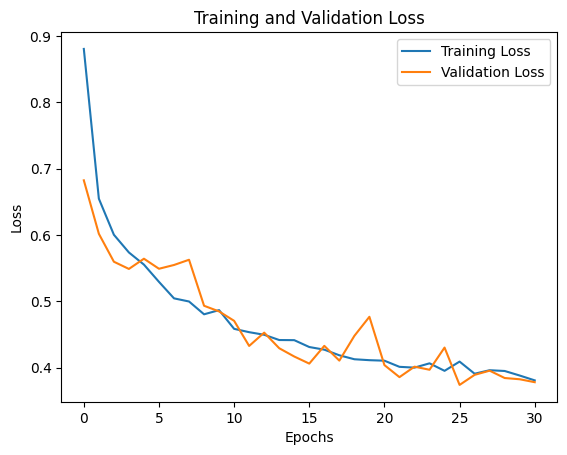

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

### Testing
Change `<Model Path>` and `<Data Path>`
* Load Testing Dataset
* Load model
* Run Testing Suite

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0
)

In [ ]:
test_directory = '<Path to Data>'
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(40, 40),
    batch_size=500,
    class_mode='sparse',
    subset='training'
)

Found 2000 images belonging to 4 classes.


In [ ]:
model_path = '<Path to Model>'
test_model_5_8 = tf.keras.models.load_model(model_path)

In [ ]:
batch_images, batch_labels = test_generator.next()
preds = test_model_5_8.predict(batch_images)

16/16 [==============================] - 1s 25ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

preds = test_model_5_8.predict(batch_images)

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate precision, recall, and F1 score using sklearn
average_type = 'weighted'  # Choose 'micro', 'macro', 'weighted', or None
precision = precision_score(batch_labels, batch_predictions_classes, average=average_type)
recall = recall_score(batch_labels, batch_predictions_classes, average=average_type)
f1 = f1_score(batch_labels, batch_predictions_classes, average=average_type)
accuracy = accuracy_score(batch_labels, batch_predictions_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.828
Precision: 0.8310930121207146
Recall: 0.828
F1 Score: 0.8293484661375182


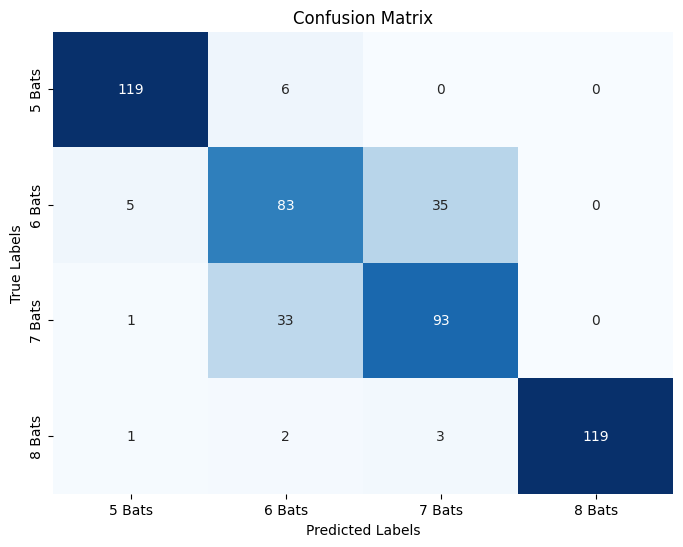

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(batch_labels, batch_predictions_classes)
label_names = ['5 Bats', '6 Bats', '7 Bats', '8 Bats']
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 9-12 bats
Change `<Path to Data>`
* Load data from folder
* Call `create_model()`
* fit on data
* When done download the .keras file.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# Specify the path to the training data directory.
train_directory = "<Path to Data>"
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 19200 images belonging to 4 classes.
Found 4800 images belonging to 4 classes.


In [ ]:
model_9_12 = create_model_with_padding()

In [ ]:
# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint(
    filepath='9_12_bats.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

In [ ]:
# Train the model
history = model_9_12.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Total number of steps (batches of samples).
    epochs=50,  # Total number of epochs to train for.
    validation_data=validation_generator,  # Validation data to evaluate the model.
    validation_steps=len(validation_generator),  # Total number of steps for validation.
    callbacks=[checkpoint, early_stopping]  # Apply callbacks during training.
)

Epoch 1/50
599/600 [============================>.] - ETA: 0s - loss: 1.2658 - accuracy: 0.3396
Epoch 1: val_loss improved from inf to 1.11372, saving model to 9_12_bats.keras
600/600 [==============================] - 45s 61ms/step - loss: 1.2656 - accuracy: 0.3398 - val_loss: 1.1137 - val_accuracy: 0.4419
Epoch 2/50
600/600 [==============================] - ETA: 0s - loss: 1.0266 - accuracy: 0.4780
Epoch 2: val_loss improved from 1.11372 to 1.03101, saving model to 9_12_bats.keras
600/600 [==============================] - 26s 44ms/step - loss: 1.0266 - accuracy: 0.4780 - val_loss: 1.0310 - val_accuracy: 0.4750
Epoch 3/50
600/600 [==============================] - ETA: 0s - loss: 0.9864 - accuracy: 0.4981
Epoch 3: val_loss improved from 1.03101 to 0.94530, saving model to 9_12_bats.keras
600/600 [==============================] - 26s 44ms/step - loss: 0.9864 - accuracy: 0.4981 - val_loss: 0.9453 - val_accuracy: 0.5269
Epoch 4/50
600/600 [==============================] - ETA: 0s - l

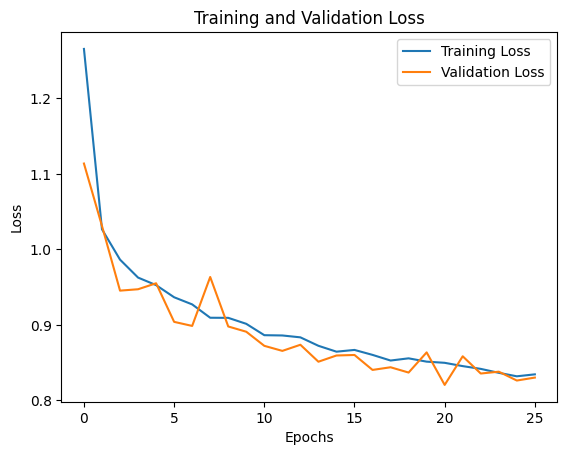

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

### Testing
Change `<Model Path>` and `<Data Path>`
* Load Testing Dataset
* Load model
* Run Testing Suite

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0
)

In [ ]:
test_directory = "<Path to Data>"
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(40, 40),
    batch_size=500,
    class_mode='sparse',
    subset='training'
)

Found 2000 images belonging to 4 classes.


In [ ]:
model_path = '<Path to Model>'
test_model_9_12 = tf.keras.models.load_model(model_path)

In [ ]:
batch_images, batch_labels = test_generator.next()
preds = test_model_9_12.predict(batch_images)

16/16 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

preds = test_model_9_12.predict(batch_images)

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate precision, recall, and F1 score using sklearn
average_type = 'weighted'  # Choose 'micro', 'macro', 'weighted', or None
precision = precision_score(batch_labels, batch_predictions_classes, average=average_type)
recall = recall_score(batch_labels, batch_predictions_classes, average=average_type)
f1 = f1_score(batch_labels, batch_predictions_classes, average=average_type)
accuracy = accuracy_score(batch_labels, batch_predictions_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.598
Precision: 0.5975402473776223
Recall: 0.598
F1 Score: 0.5960932096370448


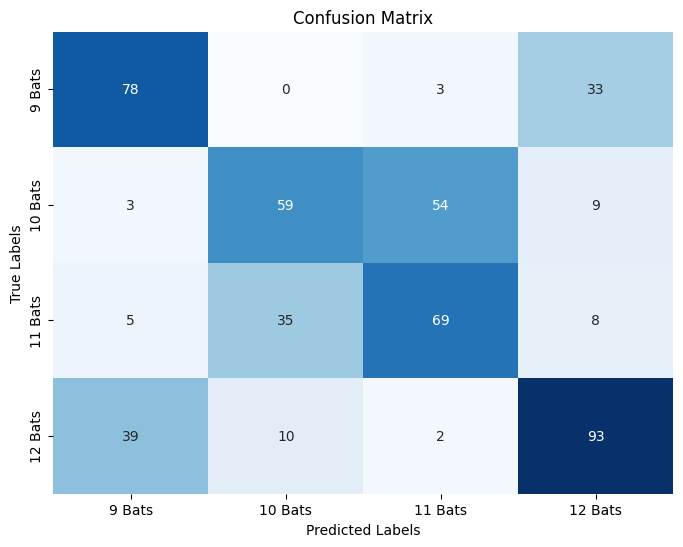

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(batch_labels, batch_predictions_classes)
label_names = ['9 Bats', '10 Bats', '11 Bats', '12 Bats']
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Top Layer CNN
Change `<Path to Data>`
* Load data from folder
* Call `create_model()`
* fit on data
* When done download the .keras file.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# Specify the path to the training data directory.
train_directory = "<Path to Data>"
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 57601 images belonging to 3 classes.
Found 14400 images belonging to 3 classes.


In [ ]:
model_9_12 = create_model_with_padding(num_classes=3)

In [ ]:
# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint(
    filepath='9_12_bats.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1
)

In [ ]:
# Train the model
history = model_9_12.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Total number of steps (batches of samples).
    epochs=50,  # Total number of epochs to train for.
    validation_data=validation_generator,  # Validation data to evaluate the model.
    validation_steps=len(validation_generator),  # Total number of steps for validation.
    callbacks=[checkpoint, early_stopping]  # Apply callbacks during training.
)

Epoch 1/50
1801/1801 [==============================] - ETA: 0s - loss: 0.4758 - accuracy: 0.7780
Epoch 1: val_loss improved from inf to 0.35798, saving model to 9_12_bats.keras
1801/1801 [==============================] - 86s 47ms/step - loss: 0.4758 - accuracy: 0.7780 - val_loss: 0.3580 - val_accuracy: 0.8360
Epoch 2/50
1800/1801 [============================>.] - ETA: 0s - loss: 0.3452 - accuracy: 0.8454
Epoch 2: val_loss did not improve from 0.35798
1801/1801 [==============================] - 79s 44ms/step - loss: 0.3452 - accuracy: 0.8454 - val_loss: 0.4954 - val_accuracy: 0.7869
Epoch 3/50
1801/1801 [==============================] - ETA: 0s - loss: 0.3111 - accuracy: 0.8598
Epoch 3: val_loss improved from 0.35798 to 0.28000, saving model to 9_12_bats.keras
1801/1801 [==============================] - 80s 44ms/step - loss: 0.3111 - accuracy: 0.8598 - val_loss: 0.2800 - val_accuracy: 0.8805
Epoch 4/50
1801/1801 [==============================] - ETA: 0s - loss: 0.2828 - accuracy:

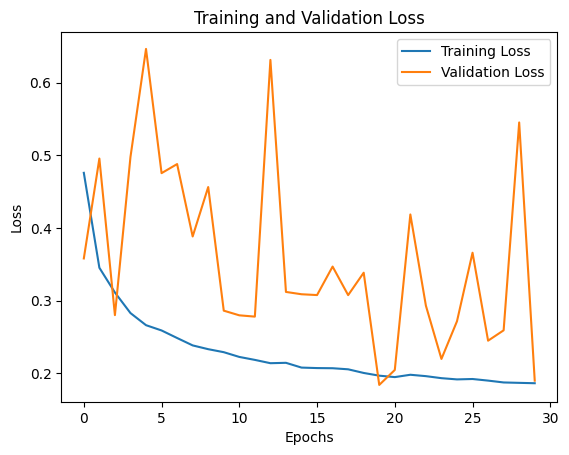

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

### Testing
Change `<Model Path>` and `<Data Path>`
* Load Testing Dataset
* Load model
* Run Testing Suite

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0
)

In [ ]:
test_directory = '<Path to Data>'
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(40, 40),
    batch_size=500,
    class_mode='sparse',
    subset='training'
)

In [ ]:
model_path = '<Path to Model>'
test_model_total = tf.keras.models.load_model(model_path)

In [ ]:
batch_images, batch_labels = test_generator.next()
preds = test_model_total.predict(batch_images)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

preds = test_model_total.predict(batch_images)

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate precision, recall, and F1 score using sklearn
average_type = 'weighted'  # Choose 'micro', 'macro', 'weighted', or None
precision = precision_score(batch_labels, batch_predictions_classes, average=average_type)
recall = recall_score(batch_labels, batch_predictions_classes, average=average_type)
f1 = f1_score(batch_labels, batch_predictions_classes, average=average_type)
accuracy = accuracy_score(batch_labels, batch_predictions_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(batch_labels, batch_predictions_classes)
label_names = ['9 Bats', '10 Bats', '11 Bats', '12 Bats']
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 1-12 bats
Change `<Path to Data>`
* Load data from folder
* Call `create_model()`
* fit on data
* When done download the .keras file.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
# Specify the path to the training data directory.
train_directory = "<Path to Data>"
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(40, 40),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

In [ ]:
model_1_12 = create_model_with_padding()

In [ ]:
# Define callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint(
    filepath='1_12_bats.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

In [ ]:
# Train the model
history = model_1_12.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Total number of steps (batches of samples).
    epochs=50,  # Total number of epochs to train for.
    validation_data=validation_generator,  # Validation data to evaluate the model.
    validation_steps=len(validation_generator),  # Total number of steps for validation.
    callbacks=[checkpoint, early_stopping]  # Apply callbacks during training.
)

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

### Testing

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0
)

In [ ]:
test_directory = "<Path to Data>"
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(40, 40),
    batch_size=500,
    class_mode='sparse',
    subset='training'
)

In [ ]:
model_path = '<Path to Model>'
test_model_1_12 = tf.keras.models.load_model(model_path)

In [ ]:
batch_images, batch_labels = test_generator.next()
preds = test_model_1_12.predict(batch_images)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

preds = test_model_9_12.predict(batch_images)

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate precision, recall, and F1 score using sklearn
average_type = 'weighted'  # Choose 'micro', 'macro', 'weighted', or None
precision = precision_score(batch_labels, batch_predictions_classes, average=average_type)
recall = recall_score(batch_labels, batch_predictions_classes, average=average_type)
f1 = f1_score(batch_labels, batch_predictions_classes, average=average_type)
accuracy = accuracy_score(batch_labels, batch_predictions_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming batch_labels is the true labels and batch_predictions are the predicted labels

# Convert batch_predictions to class labels (argmax)
batch_predictions_classes = np.argmax(preds, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(batch_labels, batch_predictions_classes)
label_names = [f'{i} Bats' for i in range(1, 13)]
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()